In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import word2vec
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%pip install lazypredict

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Алгоритмы ХИИ/cleaned_dataset.csv')
data

,gap,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-0.988977,-0.374697,-1.221278,0.208722,NaN,-1.113899,0.222836,NaN,-0.179338,0.193855,...,0.686634,-0.490566,0.626532,1.832664,1.753173,NaN,-0.587386,NaN,NaN,1.319191
1,-0.579700,-0.654523,0.014112,-0.259228,-0.187404,0.173694,NaN,0.405434,-0.513867,-1.311073,...,-1.400617,-1.268212,-1.558783,-0.590606,-1.089393,-0.186698,-1.662296,-1.411004,1.515295,0.496918
2,0.349252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.712755,-0.369041,-0.603583,-0.353128,0.139589,-0.155723,NaN,0.000792,-0.179338,-0.756626,...,0.822027,0.227255,0.869564,NaN,0.556303,1.033803,-0.157422,NaN,0.869118,1.387713
4,-1.023981,-0.089073,-0.603583,0.124190,NaN,0.232246,0.135285,0.540315,0.266701,-0.122972,...,0.447283,-0.479488,0.116030,0.839529,0.182281,1.033803,-0.372404,-0.381638,0.762785,0.633963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16227,1.078950,0.758748,0.631807,1.607094,NaN,0.743857,NaN,0.540315,0.712740,0.193855,...,NaN,0.342934,0.524283,0.291221,-0.640567,0.423553,0.702506,NaN,-0.177854,-0.873537
16228,-1.018596,0.334555,0.014112,-0.368896,0.909729,-0.931570,-0.375408,-0.538731,NaN,-0.122972,...,0.935028,NaN,1.145137,NaN,0.481498,-0.186698,0.702506,0.768829,-0.177854,0.291350
16229,1.388601,-1.927668,-1.838973,-0.704036,-0.067125,0.052523,-0.722514,0.405434,-0.012073,0.114648,...,-1.400617,-2.044859,-1.700834,0.053795,-0.191741,-2.017448,-1.877278,-1.713758,0.795502,0.359872
16230,0.023446,-1.363208,NaN,0.519178,1.065316,-1.088310,0.544378,0.405434,-0.513867,-1.311073,...,-1.400617,-1.268212,-1.558783,0.295810,NaN,-0.186698,NaN,-1.411004,1.515295,0.496918


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


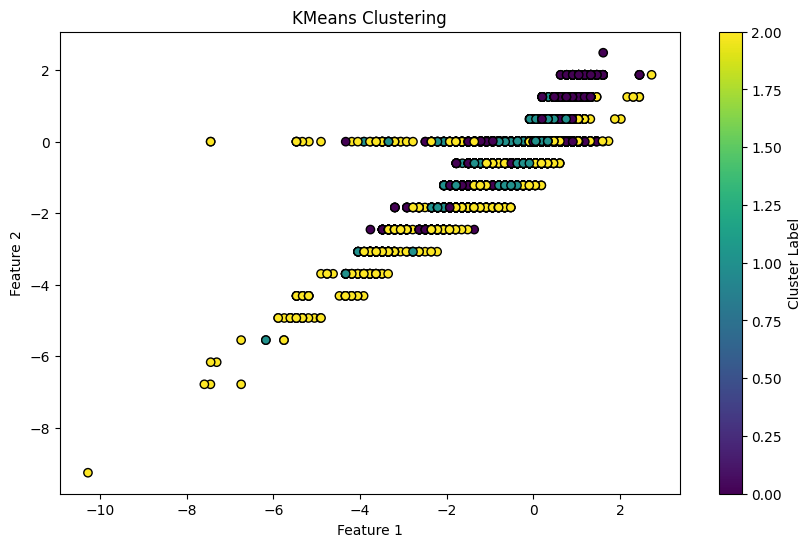

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

df = data.fillna(0)

X = df.drop('gap', axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


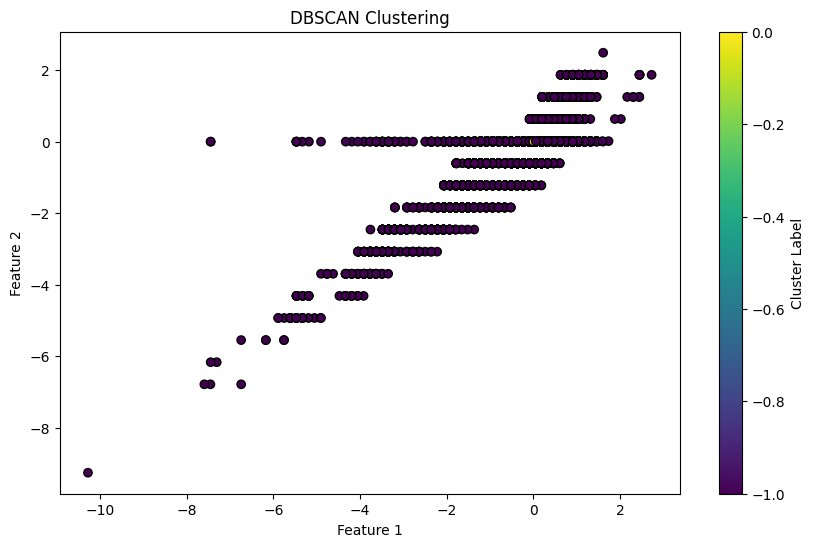

In [9]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Предположим, что у вас есть DataFrame df с вашими данными, включая признаки и таргетную переменную 'gap'

# Отделяем признаки от таргетной переменной
X = df.drop('gap', axis=1)

# Создаем объект DBSCAN с параметрами eps и min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Применяем DBSCAN к данным
dbscan.fit(X)

# Получаем метки кластеров
labels = dbscan.labels_

# Визуализируем результаты, предполагая, что данные содержат только два признака для удобства визуализации
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


Выводы: различными алгоритмами провели кластеризацию и выявили, что алгоритм KMeans разделил лучше